## Numpy Review

In [1]:
import numpy as np

In [4]:
# numpy.arange => create one-dim array with evenly spaced values
print(np.arange(5))
print(np.arange(start=1, stop=6, step=2))

[0 1 2 3 4]
[1 3 5]


In [6]:
# numpy.random.randint => generate numbers between lower bounnd and upper bound
print(np.random.randint(low=0, high=10, size=(3,4)))

[[2 0 1 1]
 [5 9 4 2]
 [1 3 9 0]]


In [7]:
# numpy.column_stack => stacks 2 one-dim ndarrays on top of eachother
a = np.arange(1,4)
b = np.arange(4,7)

np.column_stack((a,b))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
# transposing and reshaping
x = np.arange(6)
b = x.reshape(3,2)
print(x)
print(b)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]


In [9]:
# transpose
b.T

array([[0, 2, 4],
       [1, 3, 5]])

In [10]:
# numpy.diag() => create diagonal arrangment
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

## Matplotlib - Object Hierarchy

Screenshot 2020-11-02 at 21.21.34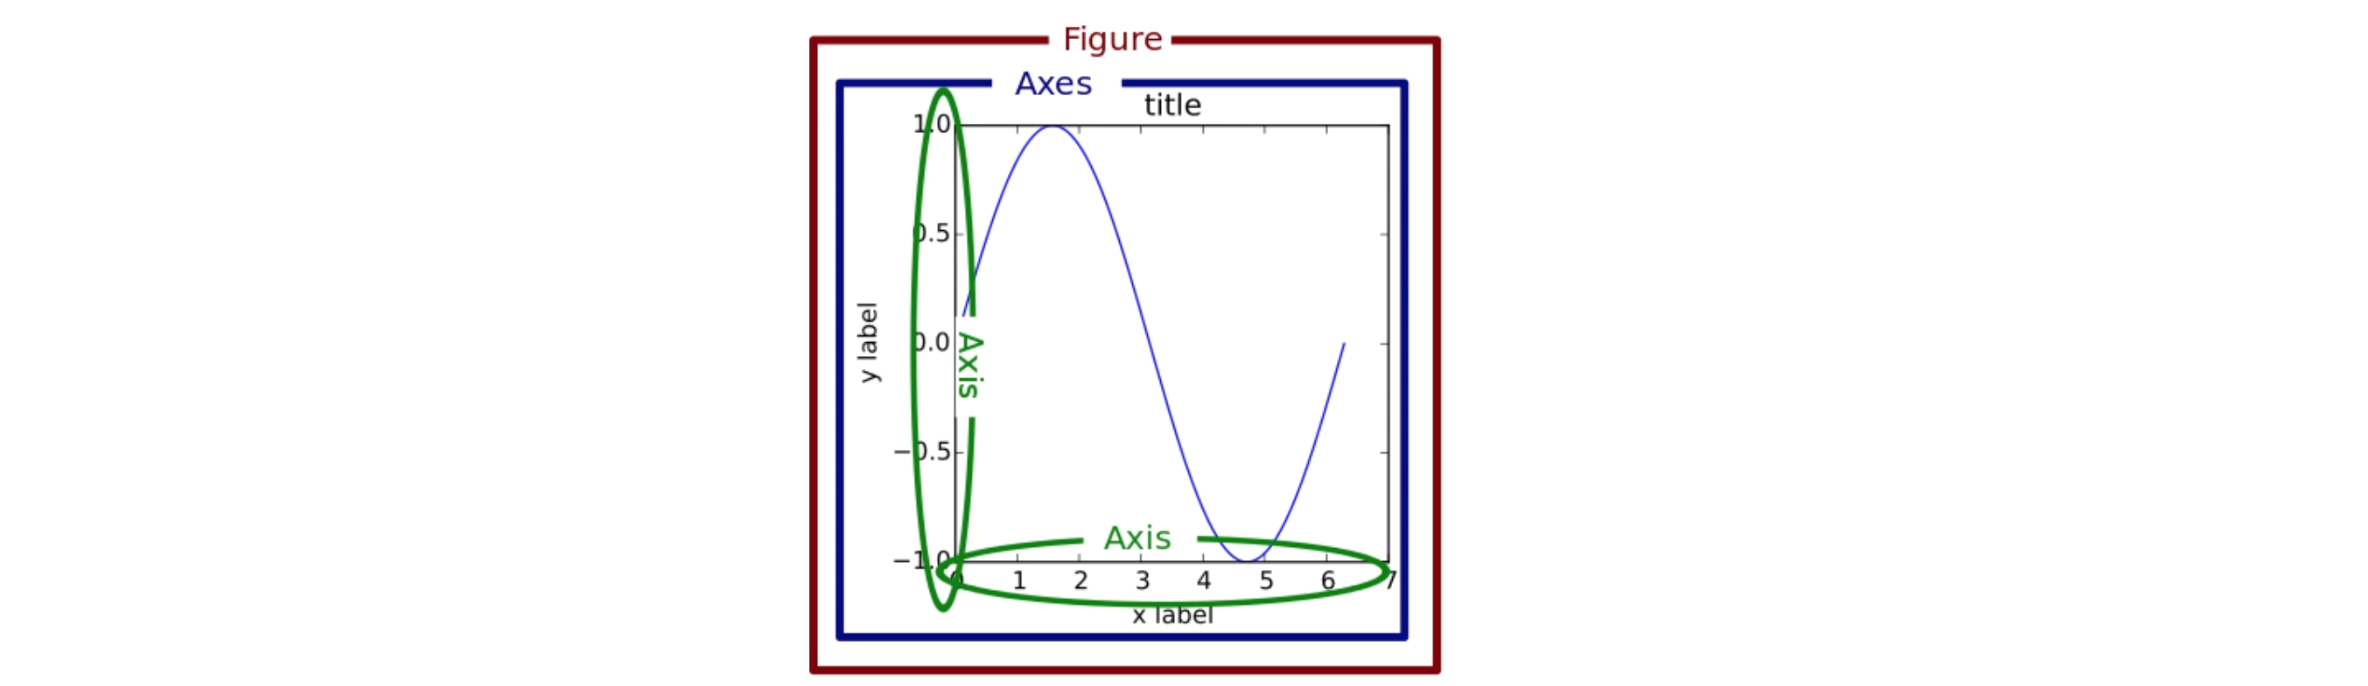

Screenshot 2020-11-02 at 21.23.24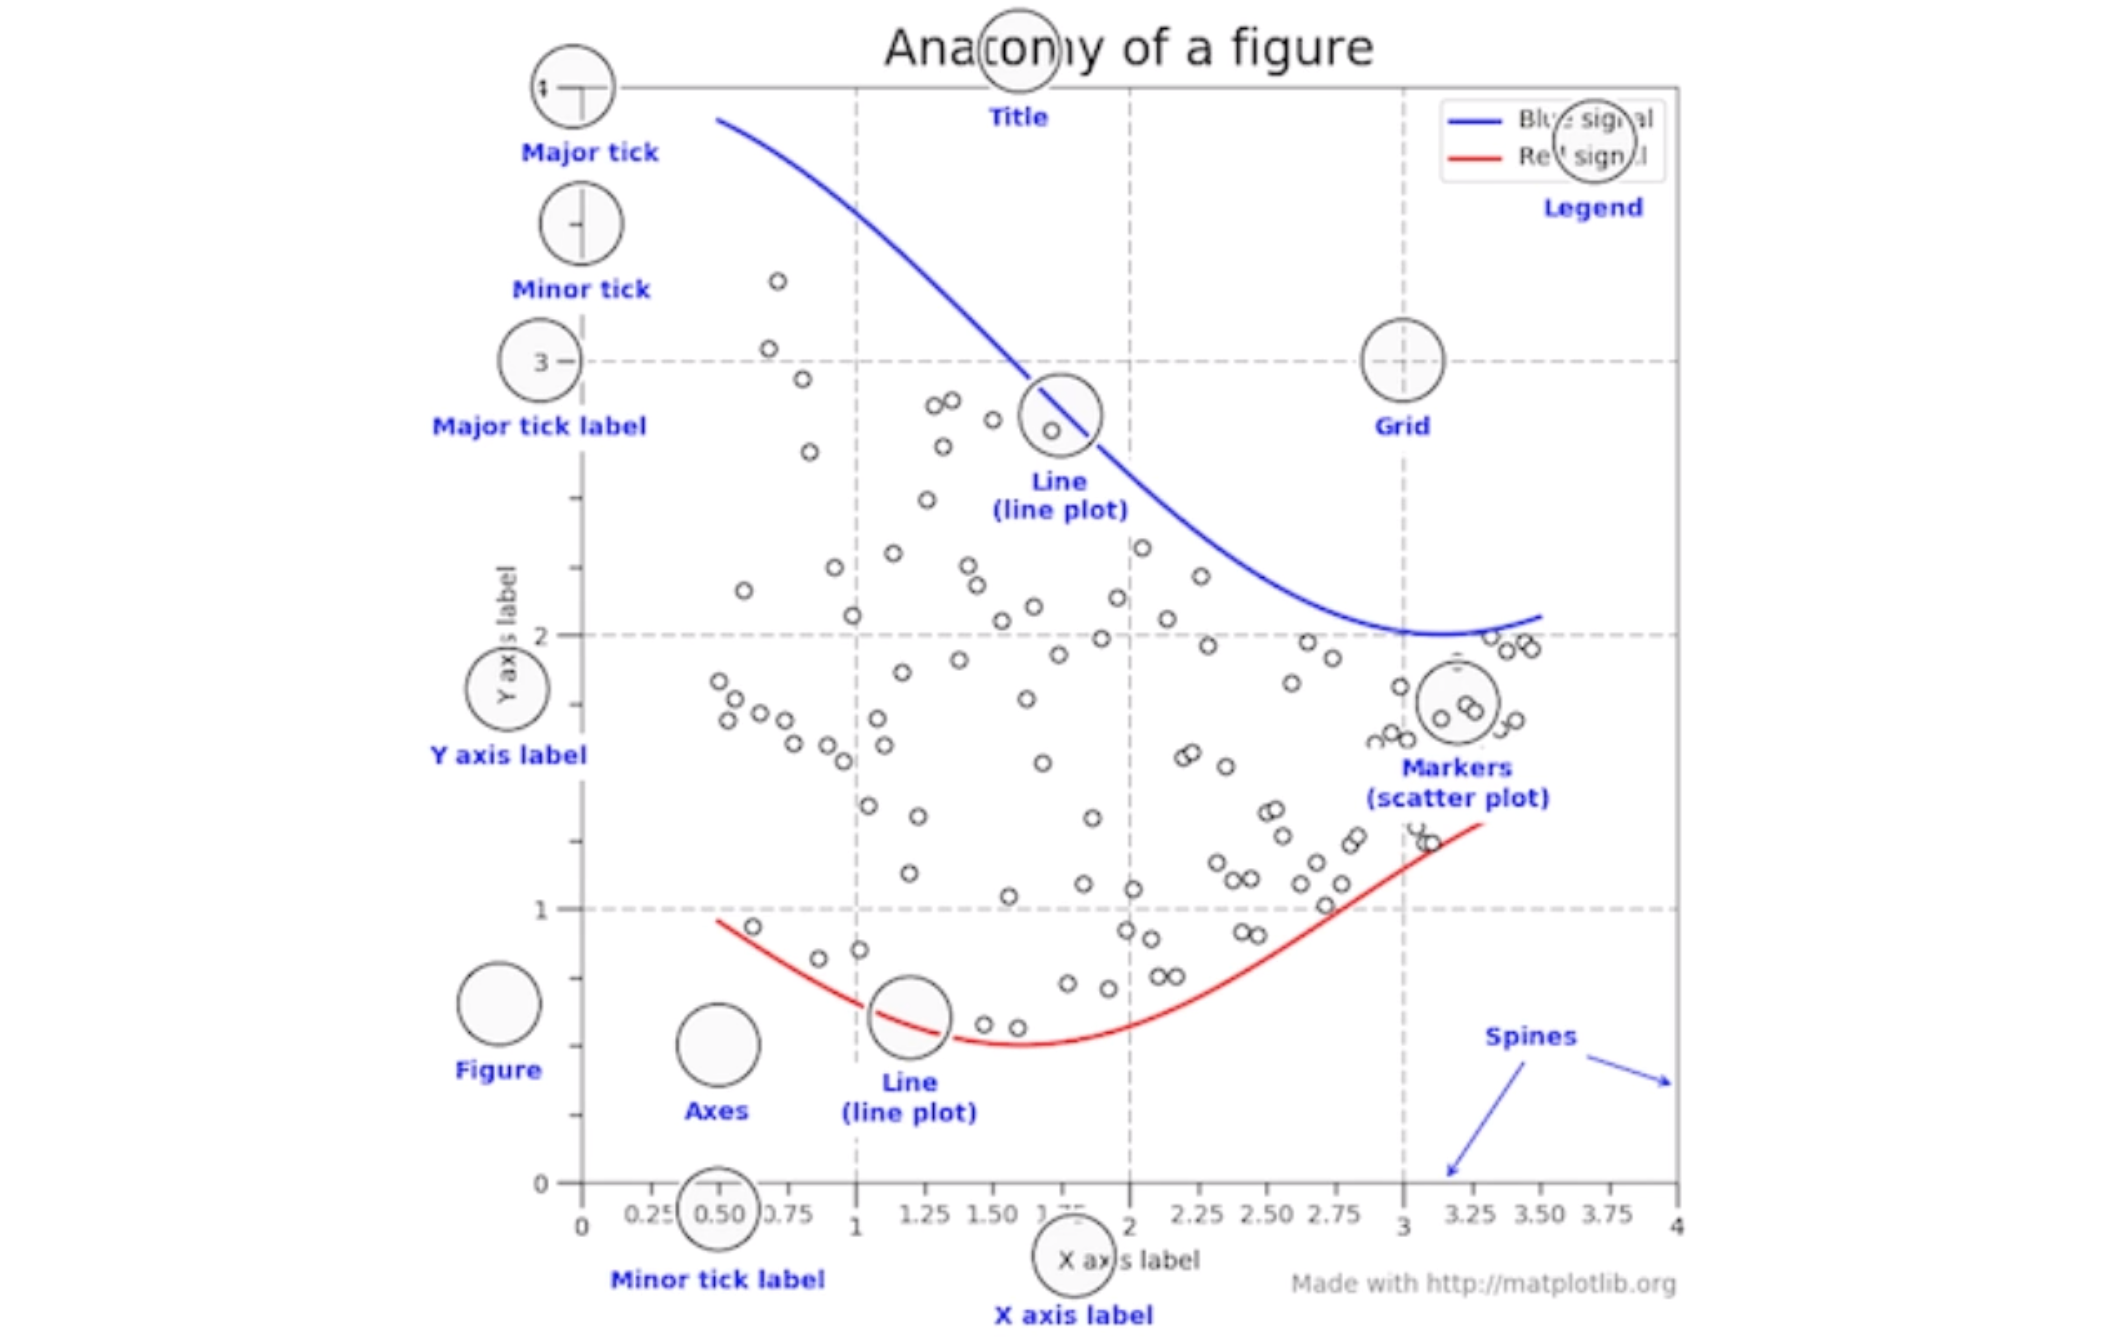

## First Plot

[[ 3  1  9 11  7  9 13 13 16 18 12 13 14 13 17 23 16 23 24 19 23 21 28 30
  33 28 34 34 31 31 36 40 34 42 42 44 39 39 40 47 41 46 48 50 50 45 46 47
  48 53]
 [ 8  2 11 11  9 13 15 11 14 15 14 12 20 15 21 24 19 21 20 24 20 21 30 24
  24 34 35 30 30 36 36 31 37 38 38 43 39 41 47 43 47 42 47 47 48 45 48 49
  53 57]
 [ 5  7  8  4  5 11 14 11  9  9 19 13 15 20 17 18 18 24 26 25 26 28 27 30
  27 34 27 30 28 33 37 36 33 38 35 39 45 44 40 43 43 48 51 45 46 45 47 52
  50 53]]


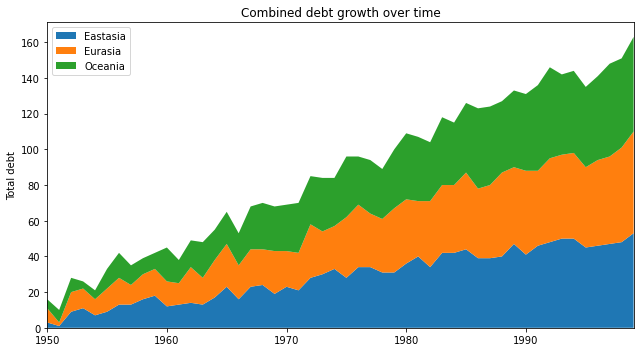

In [19]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(444)

rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

print(rng + rnd)
fig, ax = plt.subplots(figsize=(9, 5))

ax.stackplot(yrs, rng+rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])

fig.tight_layout()
plt.show()

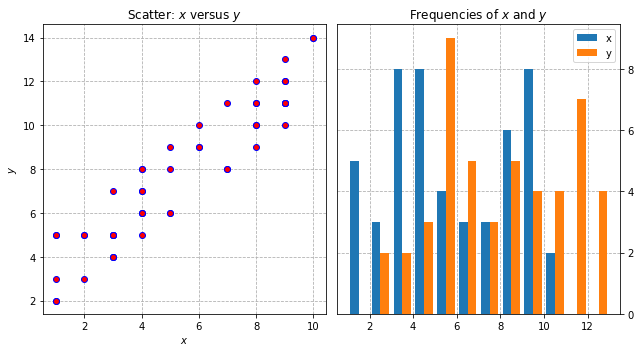

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x,y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,5))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_axisbelow(True)
ax1.grid(linestyle='--')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
ax2.legend(loc=(0))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()
ax2.set_axisbelow(True)
ax2.grid(linestyle='--')

fig.tight_layout()

## Advanced Plotting

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'https://ndownloader.figshare.com/files/5976036'
b = BytesIO(urlopen(url).read()) #open url as sequeance or bytes
fpath = 'CaliforniaHousing/cal_housing.data' # path within the extracted dirictory

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',') #turn into ndarray
    value = housing[:,-1] # get the last element in the line
    pop,age = housing[:,[4,7]].T # get element 4 and 7 and transpose

In [50]:
def add_innerbox(ax, text):
    ax.text(.55, .8, text,
           horizontalalignment='center',
           transform=ax.transAxes,
           bbox=dict(facecolor='white', alpha=0.6),
           fontsize=12.5)

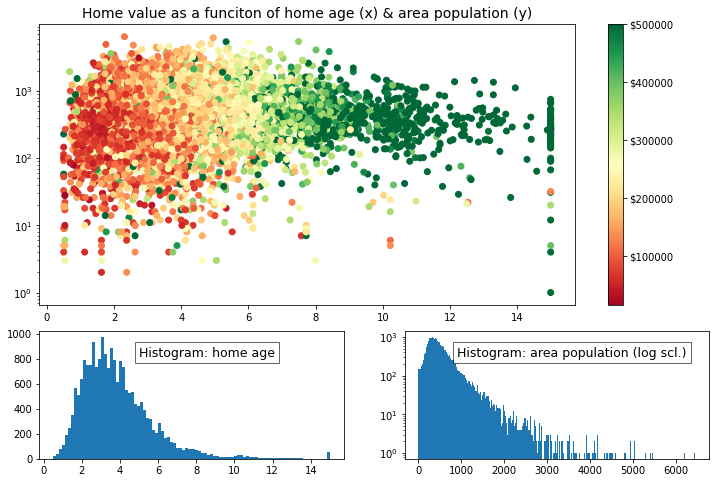

In [52]:
gridsize = (3,2)
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2,0))
ax3 = plt.subplot2grid(gridsize, (2,1))

ax1.set_title('Home value as a funciton of home age (x) & area population (y)',
             fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=value, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_innerbox(ax2, 'Histogram: home age')
add_innerbox(ax3, 'Histogram: area population (log scl.)')
plt.show()

## Plotting With Pandas

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

s = pd.Series(np.arange(5), index=list('abcde'))
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

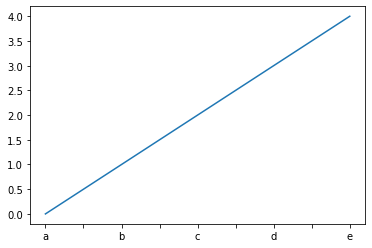

In [55]:
ax = s.plot()

In [56]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [58]:
import matplotlib.transforms as mtransforms

In [59]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(
    url, 
    index_col=0, 
    parse_dates=True, 
    na_values='.',
    infer_datetime_format=True,
    squeeze=True
).dropna()

In [61]:
vix.head()

DATE
1990-01-02    17.24
1990-01-03    18.19
1990-01-04    19.22
1990-01-05    20.11
1990-01-08    20.26
Name: VIXCLS, dtype: float64

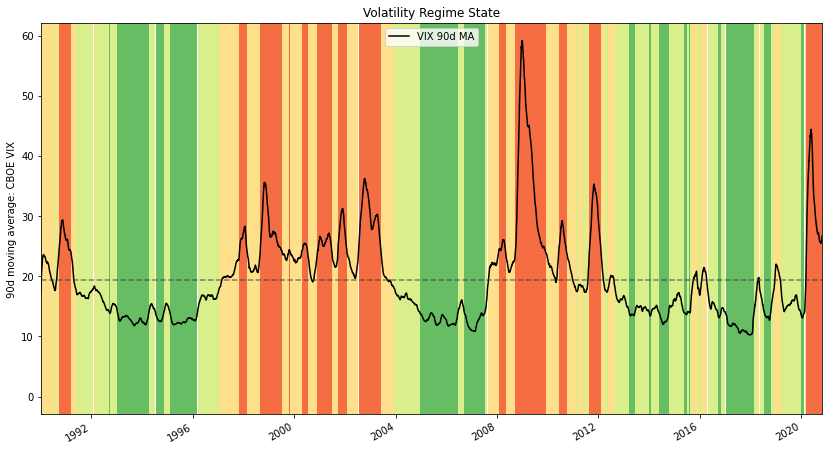

In [ ]:
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14,18,24, np.inf], labels=range(4))

cmap = plt.get_cmap('RdYlGn_r')
ma.plot(
    color='black',
    linewidth=1.5,
    marker='',
    figsize=(14,8),
    label='VIX 90d MA'
)

ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,
                   facecolor=color,
                   transform=trans)

ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
          alpha=0.6, label='Full-period mean', marker='')

plt.show()